# Day 12 – Mastering GroupBy with Merge in Pandas
Welcome to Day 12 of the 28-Day Data Warpath!  
Today, we dived into **merging multiple DataFrames** and **performing grouped aggregations** to derive insights like top spenders, regional performance, and gender-based spending patterns.

---

## Step 1: Load the Data

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample customer data
customers = pd.DataFrame({
    'CustomerID': [101, 102, 103, 104],
    'Name': ['Alice', 'Bob', 'Charlie', 'Diana'],
    'Gender': ['Female', 'Male', 'Male', 'Female'],
    'Region': ['North', 'South', 'East', 'West']
})

# Sample transactions data
transactions = pd.DataFrame({
    'TransactionID': [1, 2, 3, 4, 5],
    'CustomerID': [101, 102, 103, 104, 101],
    'Amount': [200, 300, 150, 400, 100]
})

## Step 2: Merge the DataFrames

In [25]:
# Merging the datasets using inner join
merged = transactions.merge(customers, on='CustomerID', how='inner')
merged.head()

,TransactionID,CustomerID,Amount,Name,Gender,Region
0,1,101,200,Alice,Female,North
1,2,102,300,Bob,Male,South
2,3,103,150,Charlie,Male,East
3,4,104,400,Diana,Female,West
4,5,101,100,Alice,Female,North


## Step 3: Total Spend by Region

In [26]:
total_spend = merged.groupby('Region')['Amount'].sum().reset_index()
total_spend = total_spend.sort_values(by='Amount', ascending=False)
print("Total Spend by Region:")
print(total_spend)

Total Spend by Region:
  Region  Amount
3   West     400
1  North     300
2  South     300
0   East     150


## Step 4: Average Spend by Gender

In [27]:
avg_spend_gender = merged.groupby('Gender')['Amount'].mean().reset_index()
print("Average Spend by Gender:")
print(avg_spend_gender)

Average Spend by Gender:
   Gender      Amount
0  Female  233.333333
1    Male  225.000000


## Step 5: Number of Transactions per Region

In [28]:
transaction_count = merged.groupby('Region')['TransactionID'].count().reset_index()
transaction_count.columns = ['Region', 'TransactionCount']
print("Number of Transactions by Region:")
print(transaction_count)

Number of Transactions by Region:
  Region  TransactionCount
0   East                 1
1  North                 2
2  South                 1
3   West                 1


## Step 6: Add Tier Based on Amount

In [29]:
merged['Tier'] = merged['Amount'].apply(lambda x: 'High' if x > 300 else 'Mid' if x > 200 else 'Low')
merged[['CustomerID', 'Amount', 'Tier']]

,CustomerID,Amount,Tier
0,101,200,Low
1,102,300,Mid
2,103,150,Low
3,104,400,High
4,101,100,Low


## Step 7: Visualizations

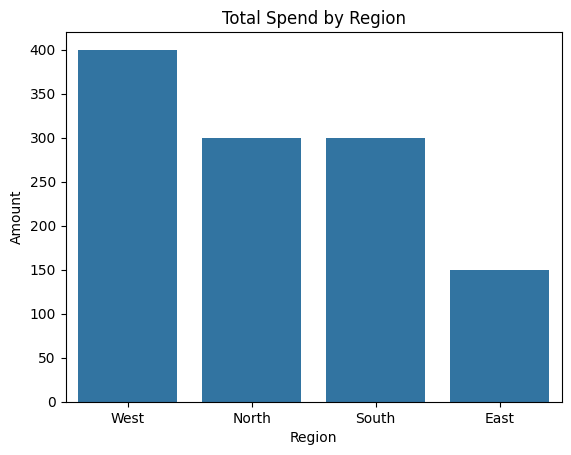

In [30]:
# Total Spend by Regionsns.
sns.barplot(data=total_spend, x='Region', y='Amount')
plt.title("Total Spend by Region")
plt.show()

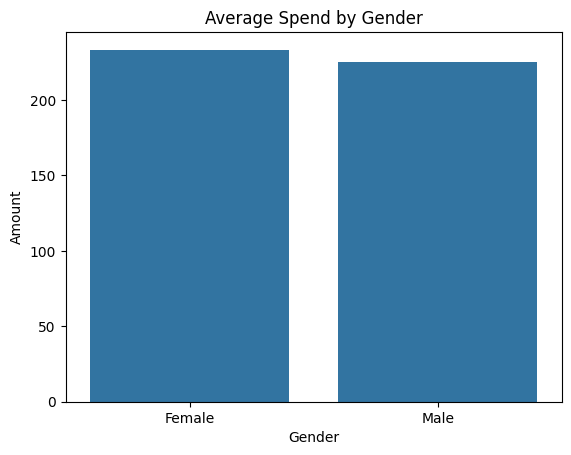

In [31]:
# Average Spend by Gender
sns.barplot(data=avg_spend_gender, x='Gender', y='Amount')
plt.title("Average Spend by Gender")
plt.show()

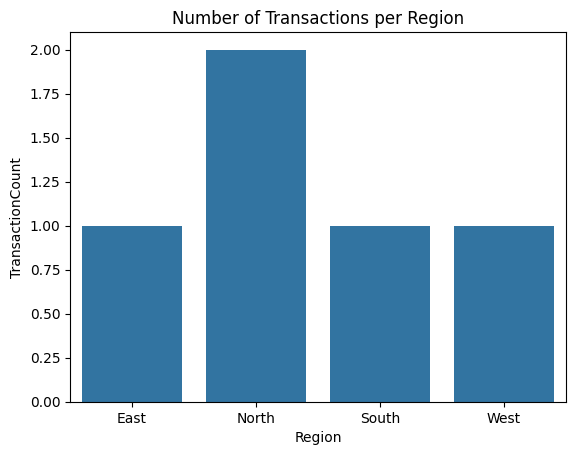

In [32]:
# Number of Transactions
sns.barplot(data=transaction_count, x='Region', y='TransactionCount')
plt.title("Number of Transactions per Region")
plt.show()

## Reflections & Learnings

- Learned how to merge two datasets and derive new insights from them.
- Practiced `groupby`, `.sum()`, `.mean()`, and `.count()` operations.
- Built visuals using `seaborn` and made observations by comparing regions and gender.
- Key Thought: *"Learning everything is not important — retaining, applying, and revisiting what you learned is what builds intuition."*

---

**Done with Day 12!**  
Let’s keep building stronger data muscles every day 💪📈  